# Investigation of QTP for test of physical system
This is a closed loop simulation example of how we wish to control the physical __quadruple tank process (QTP)__. What we wish is to investigate is which constraints may be desirable to add to the controller when we test on the real system.

The test were run after having measured the split-ratio of the system as described in the ___mpc_opc.ipynb___ notebook such that I had a chance to simulate the system in a setting which was close to what was actually gonna happen.

## Choosing constraints
Firstly, we see that the closed and open loop simulations ended up being quite close to each other (see the ___mpc_opc.ipynb___) which proved that the simulation tool was actually quite effective in describing the real scenario which was later run over then same period of time. The closed loop simulation thus is quite a powerful tool, as it is executed within seconds and not minutes, such that we may investigate a lot of different setting and tune parameters well for use when testing on the physical system.

__Note:__ I did not tune parameters much here, not is any systematic way at least. This was only an attempt to get a picture of how the testing may run and which constriants might work well in the controller.

What I found was that the offset-free controller is a must to have, as there is obvious offset in the control, as shown in the first closed loop simulation below. The controller without any input regularisation or rate-of-change constraints worked very well, but for real systems, it is often not desirable to allow for arbitrarily large changes in the input in each iteration, as it wears down the equipment.

The soft output constraints did not seem to make much of a difference, and the system it-self is equipped with a mechanism which switches off the input-flow in the event that the tanks are over-filling.

## Conclusion
I chose to go with the offset-free controller with input regularisation and input rate-of-change constraints, as this seemed best suited for this particular task as discussed in the previous section.

In [1]:
##########################################################################################
######################################### Imports ########################################
##########################################################################################
## Import closed loop simulation methods
from closed_loop_simulation import *

## Import test problem
## ...
## This class has defined; State, measurement and output methods, a simulation_step 
## method which solves the state differential equation defining the model, as well 
## as a continuous linearisation method returning system matrices for the continuous 
## linear system.
#from quadruple_tank_process import qtp


##########################################################################################
###################################### Initialistaion ####################################
##########################################################################################
## Initial values for test process in MPC
#x0 = matrix( [10000.0, 10000.0, 10000.0, 10000.0] ) # Initial state
#u0 = matrix( [250.0, 250.0] )                       # Initial input

## Initialisation of MPC related parameters
#T_s         = 16                                    # Discretisation step
#n           = 30                                    # Prediction step for MPC
#r           = matrix( [ 25, 10 ] )                  # Desired output level
#r_c         = matrix( [ 20, 20  ] )                 # Increase in set-point
#disturbance = matrix( [ 100.0, 50.0 ] )             # Disturbance, 2/3rds through
#u_min       = matrix( [ 1e-2, 1e-2 ] )              # Minimum allowed input
#u_max       = matrix( [ 500.0, 500.0 ] )            # Maximum allowed input

## Off-set free parameters
#Q_d         = 1e+0

## Input constraints
#du_max      = 20                                    # Maximum allowed input change

## Soft output constraints
#soft_bounds = matrix( [ 1.0, 1.0 ] )                # Soft output bounds

horison     = 150

dare converged to tolerance of 1e-8. Used 33 iterations.


AttributeError: 'list' object has no attribute 'get_label'

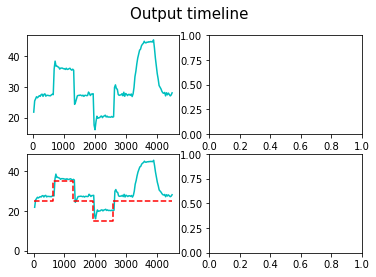

In [2]:
##########################################################################################
########################## Closed loop simulation of controller ##########################
##########################################################################################
## Define constraints
off_set     = 'off'
constraints = None

## Call closed loop simulation of MPC
T_plot, Y_plot, R_plot, U_plot, plot_info = closed_loop_simulation( \
    horison=horison, off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
closed_loop_plot( T_plot, Y_plot, R_plot, U_plot, plot_info );

In [ ]:
##########################################################################################
########################## Closed loop simulation of controller ##########################
##########################################################################################
## Define constraints
off_set     = 'on'
constraints = None

## Call closed loop simulation of MPC
T_plot, Y_plot, R_plot, U_plot, plot_info = closed_loop_simulation( \
    horison=horison, off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
closed_loop_plot( T_plot, Y_plot, R_plot, U_plot, plot_info );

In [ ]:
##########################################################################################
########################## Closed loop simulation of controller ##########################
##########################################################################################
## Define constraints
off_set     = 'on'
constraints = 'input'

## Call closed loop simulation of MPC
T_plot, Y_plot, R_plot, U_plot, plot_info = closed_loop_simulation( \
    horison=horison, off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
closed_loop_plot( T_plot, Y_plot, R_plot, U_plot, plot_info );

In [ ]:
##########################################################################################
########################## Closed loop simulation of controller ##########################
##########################################################################################
## Define constraints
off_set     = 'on'
constraints = 'soft_output'

## Call closed loop simulation of MPC
T_plot, Y_plot, R_plot, U_plot, plot_info = closed_loop_simulation( \
    horison=horison, off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
closed_loop_plot( T_plot, Y_plot, R_plot, U_plot, plot_info );